<a href="https://colab.research.google.com/github/charujhagrawat20/StackIt/blob/main/Prac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Service Rating: 6.5/10
Food Rating: 9.8/10
***Recommended Tip: 12.64%***


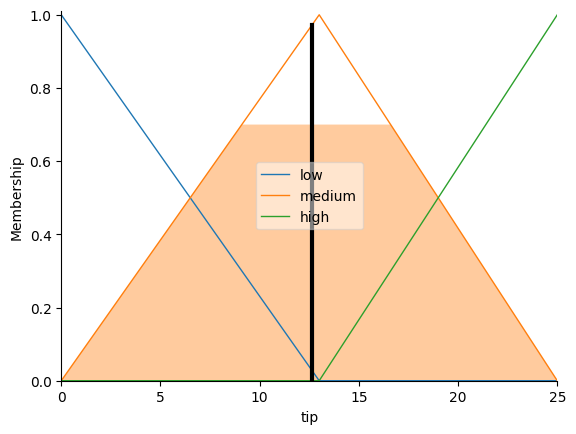


---Example 2: Poor Service/Bad Food---
Recommended Tip: 10.66%


In [4]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
food = ctrl.Antecedent(np.arange(0,11,1), 'food')
tip = ctrl.Consequent(np.arange(0,26,1), 'tip')
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['acceptable'] = fuzz.trimf(service.universe,[0,5,10])
service['excellent'] = fuzz.trimf(service.universe,[5,10,10])
food['bad'] = fuzz.trapmf(food.universe,[0,0,1,3])
food['decent'] = fuzz.trimf(food.universe,[1,5,9])
food['great'] = fuzz.trapmf(food.universe,[7,9,10,10])
tip['low'] = fuzz.trimf(tip.universe,[0,0,13])
tip['medium'] = fuzz.trimf(tip.universe,[0,13,25])
tip['high'] = fuzz.trimf(tip.universe,[13,25,25])
rule1 = ctrl.Rule(service['poor']|food['bad'],tip['low'])
rule2 = ctrl.Rule(service['acceptable'],tip['medium'])
rule3 = ctrl.Rule(service['excellent'] & service['poor'],tip['high'])
rule4 = ctrl.Rule(food['decent'] & service['poor'],tip['medium'])
tip_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4])
tipping_simulation = ctrl.ControlSystemSimulation(tip_control)
tipping_simulation.input['service']=6.5
tipping_simulation.input['food']=9.8
tipping_simulation.compute()
tip_amount = tipping_simulation.output['tip']
print(f"Service Rating: 6.5/10")
print(f"Food Rating: 9.8/10")
print(f"***Recommended Tip: {tip_amount:.2f}%***")
tip.view(sim=tipping_simulation)
plt.show()
print("\n---Example 2: Poor Service/Bad Food---")
tipping_simulation.input['service']=2
tipping_simulation.input['food']=3
tipping_simulation.compute()
print(f"Recommended Tip: {tipping_simulation.output['tip']:.2f}%")